<a href="https://colab.research.google.com/github/Jael12Hephzibah/DataScience/blob/main/Amazon_Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('/content/Amazon Sale Report.csv')

data.head()


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


Sales Overview


<ipython-input-2-b675aa7ff3cc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


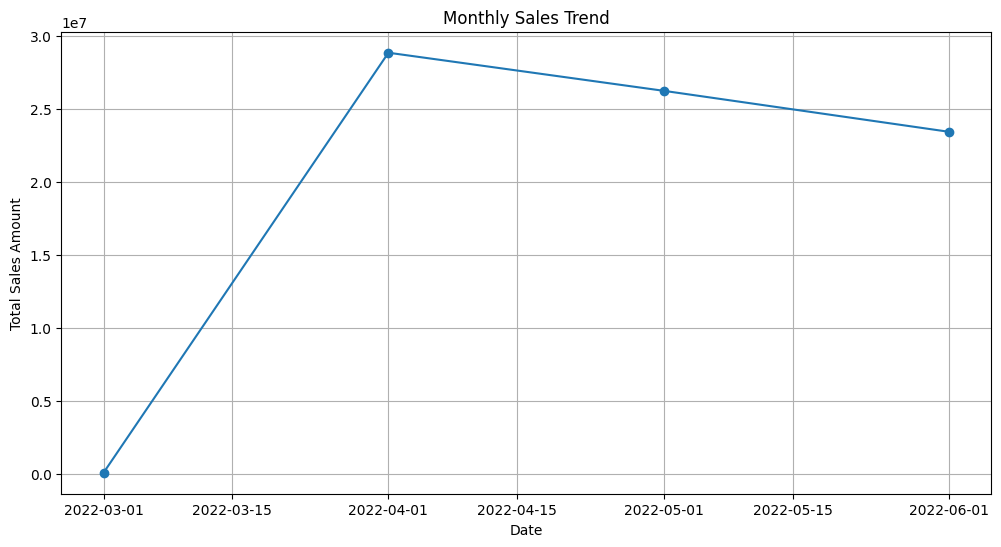

In [2]:

data['Date'] = pd.to_datetime(data['Date'])

monthly_sales = data.groupby(data['Date'].dt.to_period("M")).agg({'Amount': 'sum'}).reset_index()
monthly_sales['Date'] = monthly_sales['Date'].dt.to_timestamp()
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Amount'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Total Sales Amount")
plt.grid()
plt.show()


Product Analysis

<ipython-input-6-536eed4ad29b>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Qty', y='Category', data=product_sales.head(10), palette="viridis")


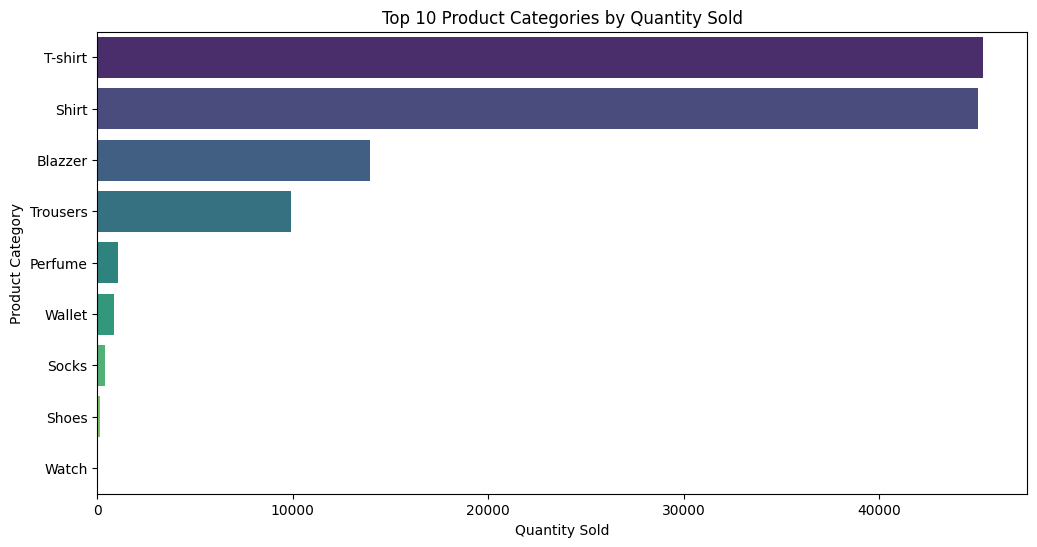

In [6]:

product_sales = data.groupby('Category').agg({'Qty': 'sum'}).sort_values(by='Qty', ascending=False).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Qty', y='Category', data=product_sales.head(10), palette="viridis")
plt.title("Top 10 Product Categories by Quantity Sold")
plt.xlabel("Quantity Sold")
plt.ylabel("Product Category")
plt.show()


Fulfillment Analysis


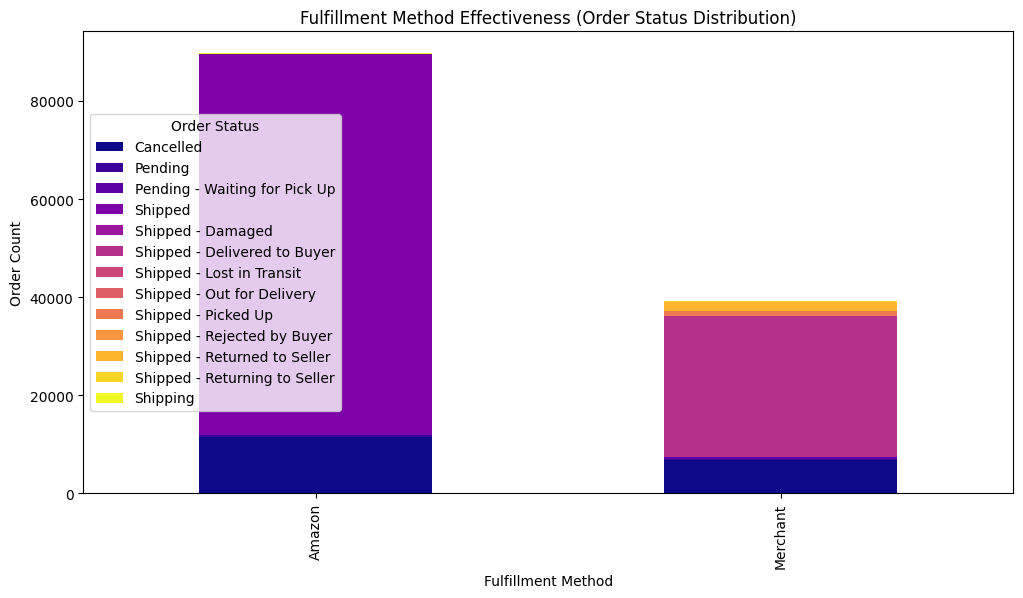

In [7]:

fulfillment_analysis = data.groupby(['Fulfilment', 'Status']).size().unstack(fill_value=0)

fulfillment_analysis.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='plasma')
plt.title("Fulfillment Method Effectiveness (Order Status Distribution)")
plt.xlabel("Fulfillment Method")
plt.ylabel("Order Count")
plt.legend(title="Order Status")
plt.show()


Geographical Analysis

<ipython-input-8-be603b9522cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Amount', y='ship-state', data=geo_sales.head(10), palette="magma")


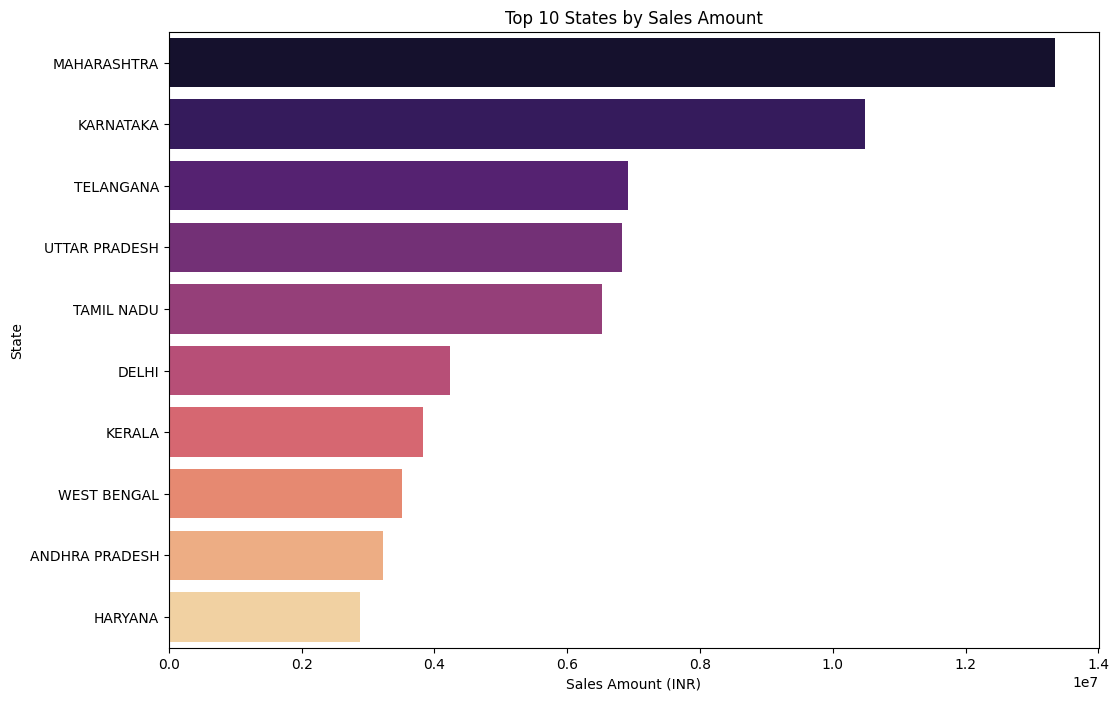

In [8]:

geo_sales = data.groupby('ship-state').agg({'Amount': 'sum'}).sort_values(by='Amount', ascending=False).reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='Amount', y='ship-state', data=geo_sales.head(10), palette="magma")
plt.title("Top 10 States by Sales Amount")
plt.xlabel("Sales Amount (INR)")
plt.ylabel("State")
plt.show()
